In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [2]:
d=np.genfromtxt('gamma_ray.txt')  #read from file and put everything in a table called d
E=d[:,0]
RA=d[:,1]
DEC=d[:,2]
L=d[:,3]
B=d[:,4]
T=d[:,5]
print len(T)

74823


In [3]:
for i in range(len(L)):
    if(L[i]>180):
        L[i]=L[i]-360

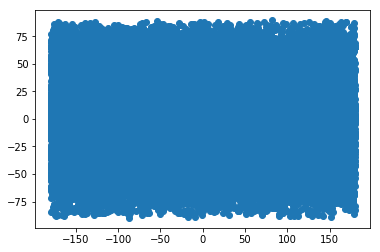

In [4]:
plt.scatter(L,B)   # scatter = plot points at their position given the two coordinates

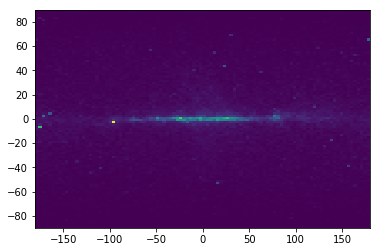

In [9]:
plt.hist2d(L,B,bins = (100,100) )
plt.show()

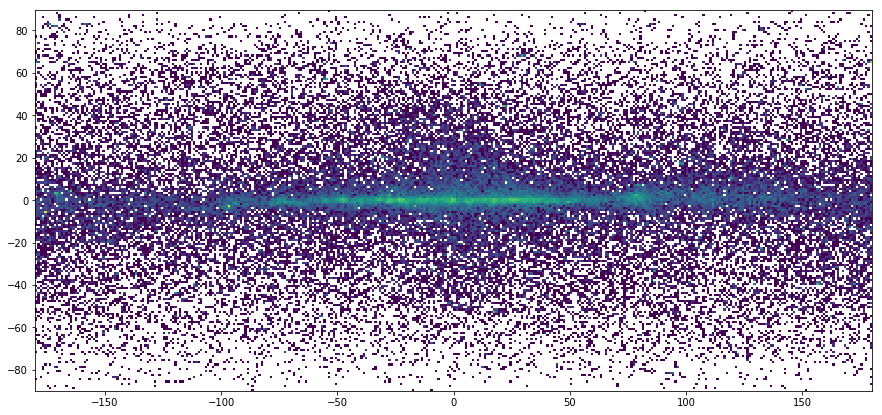

In [7]:
fig = plt.figure(figsize=(15,7)) #defines a grid of cell and has counter in every cell and count data in each cell
plt.hist2d(L,B,bins=(360,180), norm=LogNorm())
plt.show()

#### Bin in energy : find the spectrum

Text(0,0.5,u'Counts')

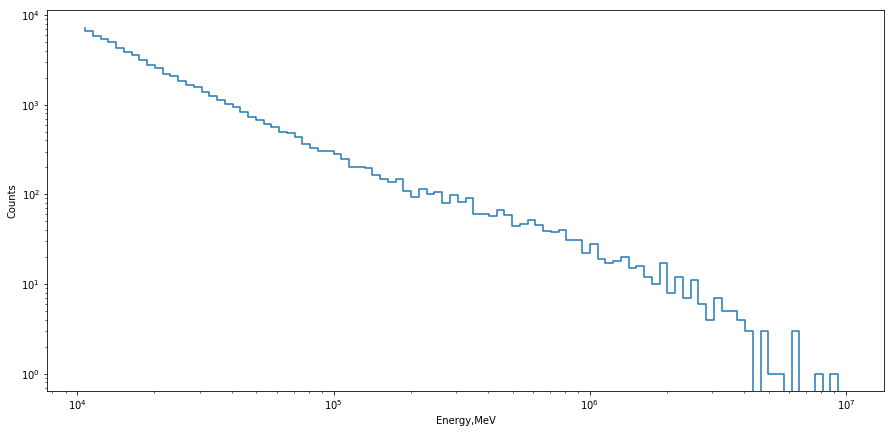

In [8]:
fig = plt.figure(figsize=(15,7))
logE = np.log10(E)
Ebins=np.logspace(4,7,100)   # it is better to take energy bins which are logarithmic in energy from 10^4 to 10^7 --> logspace makes homogeneuous logarithmic in energy (incremental in log in energy)
spectrum=np.histogram(E, bins=Ebins)
plt.step(spectrum[1][1:],spectrum[0])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy,MeV')
plt.ylabel('Counts')

344


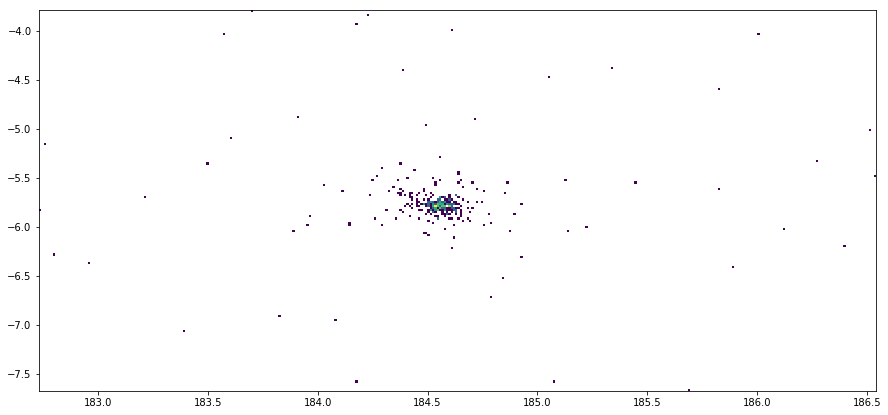

In [7]:
L_crab = 184.557449
B_crab = -5.784360
L_sub=[]
B_sub=[]
E_sub=[]
T_sub=[]
for i in range(len(L)):
    if (abs(L[i]-L_crab)<2.)and(abs(B[i]-B_crab)<2.): # Here you put the angular resolution = number of bins considered around the crab
        L_sub.append(L[i])
        B_sub.append(B[i])
        E_sub.append(E[i])
        T_sub.append(T[i])
print len(L_sub)

fig = plt.figure(figsize=(15,7)) #defines a grid of cell and has counter in every cell and count data in each cell
plt.hist2d(L_sub,B_sub,bins=(360,180), norm=LogNorm())
plt.show()

In [12]:
Emax_pos = np.argmax(E)
Lmax = L[Emax_pos]
Bmax = B[Emax_pos]
print(Lmax,Bmax)

(212.93889999999999, -3.857272)


IN time

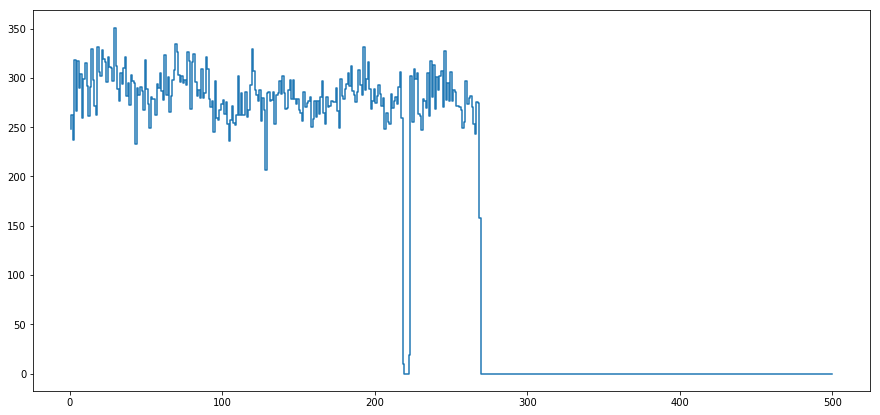

In [16]:
fig=plt.figure(figsize=(15,7))
Tbins=np.linspace(0,500,500)
lightcurve=np.histogram((T-239557417)/86400.,bins=Tbins)
plt.step(lightcurve[1][1:],lightcurve[0])